# Toggle Track Dataset

- Este dataset lo consigo a través de mis datos personales, descargados el 29 de Septiembre de 2021
- Con la intención de aplicar lo aprendido a lo largo de la asignatura en un proyecto con datos reales

# Importando los módulos necesarios

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime

# Exploración de los ficheros que tenemos en el dataset

Para poder cargar los datos del dataset, primero tenemos que mirar qué ficheros nos parecen interesantes y que ficheros parecen que no sirven para nada. Mostramos la carpeta en la que tenemos los datos:


In [2]:
base_path = "./data"
!ls $base_path

alerts.json	saved_reports.json  workspace_settings.json
clients.json	tags.json	    workspace_users.json
projects.json	team.json
projects_users	user_groups.json


Muchos de estos archivos `.json` son archivos sin información, o con información que no nos interesa. Así que pasamos a mostrar el contenido de estos archivos para hacer un primer filtrado:

In [3]:
def display_contents_of_dir(base_path: str):

    # Iteramos sobre los archivos en la carpeta de datos
    for file_name in os.listdir(base_path):
        # Tomamos el path al archivo
        file_path = os.path.join(base_path, file_name)

        # Mostramos los contenidos de un fichero regular
        if os.path.isfile(file_path):
            # Abrimos el archivo en modo lectura
            with open(file_path, "r") as fileobj:
                print(f"Contenidos de {file_path}")
                print("=" * 80)
                for line in fileobj:
                    print(line)

        # Mostramos que nos hemos encontrado con un directorio
        elif os.path.isdir(file_path):
            print(f"{file_path} es un directorio")
            print("=" * 80)

        # Mostramos la situacion inusual
        else:
            print(f"{file_path} no es reconocido ni como fichero ni como directorio")
            print("=" * 80)

        print("\n\n")

# Usamos la funcion definida para mostrar los contenidos de nuestro directorio
display_contents_of_dir(base_path = base_path)

./data/projects_users es un directorio



Contenidos de ./data/tags.json
[{"id":7133372,"name":"Becas","workspace_id":3407776},{"id":9843772,"name":"Gatod","workspace_id":3407776},{"id":9843773,"name":"Gatos","workspace_id":3407776},{"id":7435821,"name":"health","workspace_id":3407776},{"id":6042494,"name":"Informática","workspace_id":3407776},{"id":6080522,"name":"Inglés","workspace_id":3407776},{"id":6042492,"name":"Matemáticas","workspace_id":3407776},{"id":7061832,"name":"Notion","workspace_id":3407776},{"id":10000590,"name":"TFG","workspace_id":3407776},{"id":7394594,"name":"Twitch","workspace_id":3407776},{"id":7394600,"name":"Youtube","workspace_id":3407776}]



Contenidos de ./data/user_groups.json
null



Contenidos de ./data/workspace_users.json
[{"active":true,"admin":true,"email":"sergiquijano@gmail.com","group_ids":null,"id":4973755,"inactive":false,"labour_cost":null,"name":"Sergiquijano","owner":true,"rate":null,"timezone":"Europe/Madrid","uid":4817439,"wid":3407776}]




Con esto vemos que los archivos con los que nos interesa trabajar son:

- `projects.json`
- `tags.json`

Además tenemos un directorio llamado `projects_users`. El directorio `detailed_exports` lo añadimos más tarde para trabajar con datos más interesantes.

Mostramos el contenido de `projet_users` del mismo modo para saber si nos interesa trabajar con sus archivos:

In [4]:
display_contents_of_dir(os.path.join(base_path, "projects_users"))

Contenidos de ./data/projects_users/162839455.json
[{"gid":null,"group_id":null,"id":93227939,"labour_cost":null,"manager":true,"project_id":162839455,"rate":null,"user_id":4817439,"workspace_id":3407776}]



Contenidos de ./data/projects_users/152338858.json
[{"gid":null,"group_id":null,"id":74127377,"labour_cost":null,"manager":true,"project_id":152338858,"rate":null,"user_id":4817439,"workspace_id":3407776}]



Contenidos de ./data/projects_users/152311168.json
[{"gid":null,"group_id":null,"id":74078088,"labour_cost":null,"manager":true,"project_id":152311168,"rate":null,"user_id":4817439,"workspace_id":3407776}]



Contenidos de ./data/projects_users/166083644.json
[{"gid":null,"group_id":null,"id":99393239,"labour_cost":null,"manager":true,"project_id":166083644,"rate":null,"user_id":4817439,"workspace_id":3407776}]



Contenidos de ./data/projects_users/154848503.json
[{"gid":null,"group_id":null,"id":79185109,"labour_cost":null,"manager":true,"project_id":154848503,"rate":null,"

Con esto podemos pensar que no nos interesa ningún fichero de los de la carpeta que hemos explorado. Así que acabamos con los dos ficheros que mencionábamos anteriormente

# Cargando el dataset

In [5]:
# Paths de los dos archivos que nos interesan
projects_path = "projects.json"
tags_path = "tags.json"

# Cargamos los dos archivos en dos dataframes separados
projects_df = pd.read_json(os.path.join(base_path, projects_path))
tags_df = pd.read_json(os.path.join(base_path, tags_path))

# Exploración básica del dataset

Mostramos las dimensiones de nuestro dataset:

print(f"Dimensiones del dataset \"projects\": {projects_df.shape}")
print(f"Dimensiones del dataset \"tags\": {tags_df.shape}")

Como tenemos dataframes muy pequeños, podemos mostrar los contenidos de estos dataframes sin demasiados problemas:

In [6]:
projects_df

,active,actual_hours,auto_estimates,billable,cid,client_id,color,currency,estimated_hours,id,is_private,name,rate,template,wid,workspace_id
0,True,2,NaN,NaN,NaN,NaN,#e36a00,NaN,NaN,152338858,True,App Librea,NaN,NaN,0,3407776
1,True,48,NaN,NaN,NaN,NaN,#9e5bd9,NaN,NaN,151456915,False,Autoescuela,NaN,NaN,0,3407776
2,True,51,NaN,NaN,NaN,NaN,#9e5bd9,NaN,NaN,166083644,True,Bullet Journal,NaN,NaN,0,3407776
3,True,41,NaN,NaN,NaN,NaN,#d94182,NaN,NaN,151850791,True,LinuxCloud,NaN,NaN,0,3407776
4,True,66,NaN,NaN,NaN,NaN,#566614,NaN,NaN,156960844,True,Personal,NaN,NaN,0,3407776
5,True,4,NaN,NaN,NaN,NaN,#06a893,NaN,NaN,154848503,True,Productivity System,NaN,NaN,0,3407776
6,True,68,NaN,NaN,NaN,NaN,#465bb3,NaN,NaN,156728898,True,Profesional,NaN,NaN,0,3407776
7,True,1,NaN,NaN,NaN,NaN,#d94182,NaN,NaN,162839455,True,Profesor Clases Linux + Programación,NaN,NaN,0,3407776
8,True,15,NaN,NaN,NaN,NaN,#991102,NaN,NaN,167064038,True,Programming Projects,NaN,NaN,0,3407776
9,True,106,NaN,NaN,NaN,NaN,#e36a00,NaN,NaN,151981904,False,Tareas del hogar,NaN,NaN,0,3407776


In [7]:
tags_df

,id,name,workspace_id
0,7133372,Becas,3407776
1,9843772,Gatod,3407776
2,9843773,Gatos,3407776
3,7435821,health,3407776
4,6042494,Informática,3407776
5,6080522,Inglés,3407776
6,6042492,Matemáticas,3407776
7,7061832,Notion,3407776
8,10000590,TFG,3407776
9,7394594,Twitch,3407776


Lamentablemente, el dataset no nos da toda la información detallada que cabría esperar. Por ejemplo:

- Desglose semanal de las horas trabajadas
- Desglose diario de las horas trabajadas
- Todos los *Time Entries* de trabajo con los que trabaja `Toggle`. Estos supuestos bloques podrían venir dados por:
    - Nombre del bloque
    - Proyecto al que pertenece
    - Etiqueta asignada al bloque
    - *Timestap* de inicio y de final

Con esta información, solo podemos hacer una exploración de datos muy breve y poco interesante.

# Algunas visualizaciones

En primer lugar, vamos a visualizar las horas totales que he dedicado a cada proyecto

<AxesSubplot:ylabel='name'>

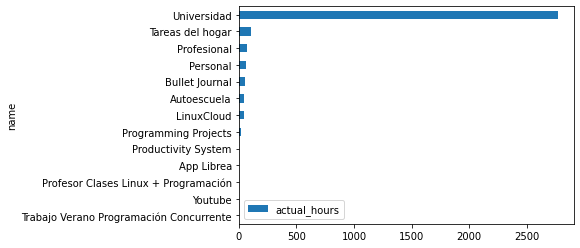

In [19]:
# Primero tomamos las columnas que nos interesan para realizar las visualizaciones
interesting_df = projects_df[["name", "actual_hours"]].sort_values("actual_hours")
interesting_df.plot(x="name", y="actual_hours", kind="barh")

# Carga de datos de Time Entries

En [reporte detallado](https://track.toggl.com/reports/detailed/) se pueden descargar los *Time Entries* de forma detallada.

Decido descargar los datos detallados del último año (descargo los datos del 01/01/2021 - 29/09/2021)

In [22]:
detailed_df = pd.read_csv(os.path.join(base_path, "detailed_exports", "detailed_entries_2021.csv"))

# Exploración básica del dataset y primera limpieza

Mostramos algunos ejemplos de las entradas que tenemos en nuestro *dataframe*:

In [25]:
detailed_df.head()

,User,Email,Client,Project,Task,Description,Billable,Start date,Start time,End date,End time,Duration,Tags,Amount ()
0,Sergiquijano,sergiquijano@gmail.com,NaN,Bullet Journal,NaN,Organizar el día,No,2021-01-01,17:08:00,2021-01-01,17:12:49,00:04:49,NaN,NaN
1,Sergiquijano,sergiquijano@gmail.com,NaN,NaN,NaN,Escribir diario,No,2021-01-01,17:12:56,2021-01-01,17:31:01,00:18:05,NaN,NaN
2,Sergiquijano,sergiquijano@gmail.com,NaN,Personal,NaN,Propósitos Diciembre,No,2021-01-01,17:32:46,2021-01-01,17:46:31,00:13:45,NaN,NaN
3,Sergiquijano,sergiquijano@gmail.com,NaN,Personal,NaN,Propósitos Diciembre,No,2021-01-01,17:47:58,2021-01-01,17:49:04,00:01:06,NaN,NaN
4,Sergiquijano,sergiquijano@gmail.com,NaN,Personal,NaN,Propósitos de todo el año,No,2021-01-01,17:54:05,2021-01-01,18:20:36,00:26:31,NaN,NaN


Mostramos ahora cuantas entradas tiene nuestro dataframe:

In [35]:
print(f"Nuestro dataframe tiene {detailed_df.shape[0]} entradas")

Nuestro dataframe tiene 1720 entradas


Nos quedamos con las columnas que nos interesan para la exploración de los datos

In [40]:
detailed_df = detailed_df[["Project", "Description", "Start date", "Start time", "End date", "End time", "Duration"]]
detailed_df.tail()

,Project,Description,Start date,Start time,End date,End time,Duration
1715,Universidad,AbiertaUGR - Información Digital,2021-09-28,17:39:49,2021-09-28,18:34:51,00:55:02
1716,Universidad,Trabajo Fin de Grado - Implementar algo del pa...,2021-09-28,19:23:04,2021-09-28,20:52:33,01:29:29
1717,Tareas del hogar,Fregar pila de platos,2021-09-28,20:58:15,2021-09-28,21:14:33,00:16:18
1718,Universidad,Organizar el día,2021-09-29,12:31:50,2021-09-29,12:42:15,00:10:25
1719,Universidad,Inteligencia de Negocio - Prácticas,2021-09-29,12:42:31,2021-09-29,14:13:02,01:30:31


Queremos mostrar ahora el número de horas que hemos trabajado cada mes:

In [97]:
# Genero un dataframe vacio
month_hours = pd.DataFrame()

# Tomo la fecha de inicio de los eventos, y los paso a formato interno de pandas: fecha 
month_hours['Start date'] = pd.to_datetime(detailed_df['Start date'])

# Calculo el mes dado el string "YYYY/mm/dd"
def select_month(date_str: str) -> str:
    date_obj = datetime.datetime.strptime(date_str,'%Y-%m-%d')
    return date_obj.month
month_hours["Start Month"] = [select_month(str(date_str)[0:10]) for date_str in month_hours["Start date"]]

# Añado las duraciones de los eventos. 
month_hours["Duration"] = detailed_df["Duration"]

# Las duraciones estan en formato str, asi que las paso a minutos
def str_to_minutes(duration_str: str) -> float:
    # Slice the input str
    hour_str = duration_str[0:2]
    minute_str = duration_str[3:5]
    second_str = duration_str[6:8]
    
    # Get the int values
    hours = int(hour_str)
    minutes = int(minute_str)
    seconds = int(second_str)
    
    return hours * 60.0 + minutes * 1.0 + (seconds / 60.0)
    
month_hours["Duration (minutes)"] = [str_to_minutes(duration) for duration in month_hours["Duration"]]


# Calculo la suma de las duraciones agrupadas por cada mes
# Lo calculamos en minutos, horas y dias
duration_per_month = pd.DataFrame()
duration_per_month["Minutes"] = month_hours[["Start Month", "Duration (minutes)"]].groupby("Start Month").sum()
duration_per_month["Hours"] = duration_per_month["Minutes"] / 60.0
duration_per_month["Days"] = duration_per_month["Hours"] / 24.0

# Añado los nombres de los meses
duration_per_month["Month name"] = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre"]#, "Octubre", "Noviembre", "Diciembre"]

duration_per_month

,Minutes,Hours,Days,Month name
Start Month,,,,
1,10020.266667,167.004444,6.958519,Enero
2,8186.850000,136.447500,5.685313,Febrero
3,11635.366667,193.922778,8.080116,Marzo
4,12621.066667,210.351111,8.764630,Abril
5,13213.783333,220.229722,9.176238,Mayo
6,11575.350000,192.922500,8.038438,Junio
7,4007.583333,66.793056,2.783044,Julio
8,3449.933333,57.498889,2.395787,Agosto
9,6976.366667,116.272778,4.844699,Septiembre


<AxesSubplot:xlabel='Month name'>

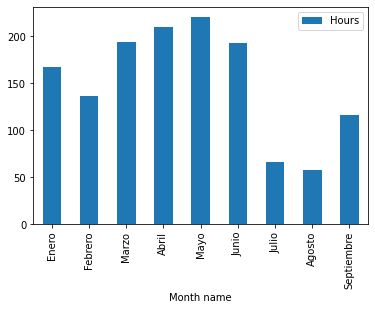

In [98]:
# Muestro las horas trabajadas cada mes
duration_per_month.plot(x = "Month name", y = "Hours", kind="bar")

**TODO** -- mostrar la misma gráfica pero que cada barra esté dividida en colores, según las horas empleadas en cada mes a cada proyecto